# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

THƯ VIỆN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

TẢI TẬP DỮ LIỆU PARKINSONS

In [3]:
path = '..\data\parkinsons.data'
data = pd.read_csv(path, sep=',')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


THUỘC TÍNH(KHÔNG BAO GỒM CỘT NAME) VÀ NHÃN(CỘT STATUS) CỦA TẬP DỮ LIỆU

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

TÁCH THUỘC TÍNH VÀ NHÃN

In [5]:
X = data.drop(columns=['name', 'status'])
y = data['status']

In [6]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

HOLD OUT

In [23]:
# Thử từng k để chọn k tốt nhất.
# Chọn k lẻ vì bài toán có 2 lớp, tránh hòa phiếu
k_values = range(3,22, 2)
result = {}
num_iterations = 100
# lặp 100 lần mỗi k
for k in k_values:
    f1_scores = []

    for i in range(num_iterations):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=i, stratify=y
        )
        # stratify=y : giữ tỉ lệ nhãn như tập dữ liệu gốc -> giữ tỉ lệ mất cân bằng

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)
        # StandardScaler chuẩn hóa theo công thức Z-score:
        #     X_scaled = (X - μ) / σ
        # Trong đó:
        #     - X: giá trị gốc
        #     - μ: trung bình của thuộc tính (mean)
        #     - σ: độ lệch chuẩn (standard deviation)
        # Kết quả: dữ liệu có mean = 0 và std = 1

        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test_scaled)

        f1 = f1_score(y_test, y_pred, average='binary')
        f1_scores.append(f1)

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    result[k] = mean_f1, std_f1

# Tìm k tốt nhất theo F1-score trung bình
best_k_value, (best_mean_f1, best_std_f1) = max(result.items(), key=lambda x: x[1][0])

SO SÁNH ACCURACY TRUNG BÌNH VÀ ĐỘ LỆCH CHUẨN CỦA MÔ HÌNH KNN THEO K

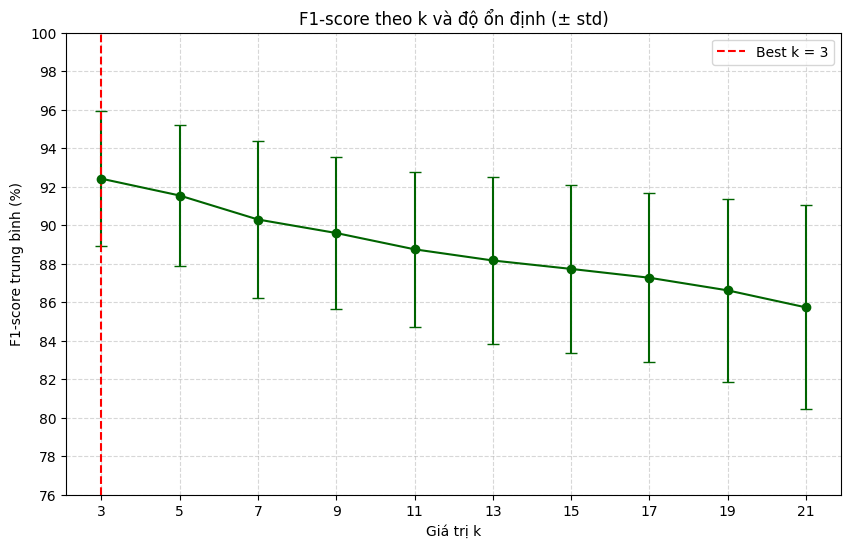

In [24]:
k_vals = list(result.keys())
means = [result[k][0] * 100 for k in k_vals]   # F1-score trung bình của từng lần lặp k
stds = [result[k][1] * 100 for k in k_vals]   # Độ lệch chuẩn F1 (%) của từng lần lặp k

plt.figure(figsize=(10, 6))
plt.errorbar(k_vals, means, yerr=stds, fmt='-o', capsize=4, color='darkgreen')
plt.axvline(best_k_value, color='red', linestyle='--', label=f'Best k = {best_k_value}')
plt.xlabel('Giá trị k')
plt.xticks(range(min(k_vals), max(k_vals)+1, 2))
plt.yticks(range(76, 101, 2))
plt.ylabel('F1-score trung bình (%)')
plt.title('F1-score theo k và độ ổn định (± std)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


ĐỘ CHÍNH XÁC CỦA MÔ HÌNH

In [25]:
print(f"F1-score (%) = {best_mean_f1 * 100:.2f}%")

F1-score (%) = 92.42%


In [26]:
print("k |   F1 (%)|   Std   |  RSD (%)")
print("-" * 32)
for k, (mean, std) in result.items():
    rsd = (std / mean) * 100
    print(f"{k:2} | {mean * 100:.2f}%  | {std:.4f} | {rsd:.2f}%")

k |   F1 (%)|   Std   |  RSD (%)
--------------------------------
 3 | 92.42%  | 0.0349 | 3.78%
 5 | 91.54%  | 0.0365 | 3.99%
 7 | 90.30%  | 0.0408 | 4.52%
 9 | 89.59%  | 0.0396 | 4.42%
11 | 88.75%  | 0.0402 | 4.53%
13 | 88.17%  | 0.0434 | 4.92%
15 | 87.73%  | 0.0438 | 4.99%
17 | 87.27%  | 0.0439 | 5.03%
19 | 86.62%  | 0.0475 | 5.49%
21 | 85.73%  | 0.0530 | 6.18%
